In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generate data

In [3]:
def generate_data(dim, num):
    x = np.random.normal(0, 10, [num, dim])
    coef = np.random.uniform(-1, 1, [dim, 1])
    pred = np.dot(x, coef)
    pred_n = (pred - np.mean(pred)) / np.sqrt(np.var(pred))
    label = np.sign(pred_n)
    mislabel_value = np.random.uniform(0, 1, num)
    mislabel = 0
    for i in range(num):
        if np.abs(pred_n[i]) < 1 and mislabel_value[i] > 0.9 + 0.1 * np.abs(pred_n[i]):
            label[i] *= -1
            mislabel += 1
    return x, label, mislabel/num

In [4]:
# example
x, y, mr = generate_data(20, 10000)
x[:5], y[:5],mr,x.shape, y.shape

(array([[  6.70052674,   5.61683667,   5.28528228,   9.68615954,
         -17.03720632,  -1.55921962,  -9.88356744,   5.93612566,
         -14.41373354,   0.22270282,  -6.83430681,  -6.64605221,
           3.4045818 ,  -5.21706107, -19.59805905,  -5.56427686,
          17.67300373,   7.22527066,  -1.75025471,  -7.18169437],
        [  7.04011907,  -3.99476777,  10.73505559,  12.66286301,
          -3.09013152,  17.63951787,   0.70231824,  -7.87096426,
          -1.31556429,   3.92695237, -19.67076693,   7.87967643,
          -5.09492316,   9.81298274,   1.19513394,  19.15771141,
         -10.76156101,   9.21183591, -12.74188855,   3.61369465],
        [-13.17178788,   0.33949481,   7.45267926,  12.81200028,
           2.80100714,  -2.13085466,   1.41010971, -15.11616577,
           6.38420041, -10.52271712,   5.70864247,   1.31966075,
          10.74757985,   9.89457579,  -0.31945501,   1.4890867 ,
         -24.42316592,   9.08743299,  18.93490832,  19.79516609],
        [ 12.17259461,

# write your model class

In [13]:
# you can do anything necessary about the model


class SVM1:
    def __init__(self):
        self.w = None
        self.loss = None
        self.dw = None      
    def svm_loss(self, w, x, y, reg):
        loss = 0.0
        
        dw = np.zeros(w.shape)
        num_train = x.shape[0]
        scores = x.dot(w)
        #print(scores[range(num_train), y[0]])
        correct_class_scores = scores[ np.arange(num_train), list(y)].reshape(num_train,1)
        margin = np.maximum(0, scores - correct_class_scores +1)
        margin[range(num_train), list(y)] = 0
        data_loss = np.sum(margin)*1.0 / num_train
        reg_loss = reg * np.sum(np.square(w))
        loss = data_loss + reg_loss
        
        x_effect = (margin > 0).astype('float')
        x_effect[range(num_train), y] -= np.sum(x_effect, axis=1)
        dw = x.T.dot(x_effect)
        dw /= num_train
        dw += 2*reg*w
        
        return loss, dw
        
    def fit(self, x, y, learning_rate, reg, num_iters, batch_size, verbose):
        """
        Fit the coefficients via your methods
        """ 
        y = y.astype('int')
        y[:] = (y[:] - np.min(y[:])) / (np.max(y[:]) - np.min(y[:]))
        for i in range(5):
            print(y[i])
        num_classes = 2
        num_train = x.shape[0]
        if self.w is None:
            self.w = 0.001 * np.random.randn(x.shape[1], num_classes)
            
        loss_history = []
        for it in range(num_iters):
            x_batch = None
            y_batch = None
            batch_idx = np.random.choice(num_train, size=batch_size, replace=False)
            x_batch = x[batch_idx]
            y_batch = y[batch_idx]
            #w_batch = self.w[batch_idx]
            #self.w = self.w
            #self.w = np.array(self.w).reshape(num_train, num_classes)
            loss, dw = self.svm_loss(self.w, x_batch, y_batch, reg)

            loss_history.append(loss)
            self.w -= learning_rate * dw
            if verbose and it % 100 == 0:
                print('iteration %d / %d  loss :' % (it, num_iters))
                print(loss)
            if loss < 0.2:
                break
        return loss_history    
            
    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a neself.w
        collection of data points.
        """
        y_pred = np.zeros(X.shape)
        y_pred = np.argmax(X.dot(self.w), axis=1)
        return y_pred
        

In [9]:

import random



class SVM2:
    
    def __init__(self):
        self.w = None
        self.c = None
        self.alpha = None
        self.b = 0
        self.loss = []


    def clip(self, alpha, L, H):
        
        if alpha < L:
            return L
        elif alpha > H:
            return H
        else:
            return alpha


    def select_j(self, i, m):
        
        l = list(range(m))
        seq = l[: i] + l[i+1:]
        return random.choice(seq)


    def f(self, x_i, x, y):
        x_i = np.array(x_i).T
        data = np.array(x)
        ks = np.dot(data, x_i)
        wx = np.dot((self.alpha*y), ks)
        fx = wx + self.b
        return fx
    
    
    def fit(self, x, y, C, max_iter):
        x = np.array(x)
        m, n = x.shape
        y = np.array(y)
        self.alpha = np.zeros(m)
        self.b = 0
        self.c = C
        it = 0

        while it < max_iter:
            pair_changed = 0
            for i in range(m):
                a_i, x_i, y_i = self.alpha[i], x[i], y[i]
                fx_i = self.f(x_i, x, y)
                loss_i = fx_i - y_i
                j = self.select_j(i, m)
                a_j, x_j, y_j = self.alpha[j], x[j], y[j]
                fx_j = self.f(x_j, x, y)
                loss_j = fx_j - y_j
                K_ii, K_jj, K_ij = np.dot(x_i, x_i), np.dot(x_j, x_j), np.dot(x_i, x_j)
                eta = K_ii + K_jj - 2*K_ij
                if eta <= 0:
                    continue
                a_i_old, a_j_old = a_i, a_j
                a_j_new = a_j_old + y_j*(loss_i - loss_j)/eta
                if y_i != y_j:
                    L = max(0, a_j_old - a_i_old)
                    H = min(self.c, self.c + a_j_old - a_i_old)
                else:
                    L = max(0, a_i_old + a_j_old - self.c)
                    H = min(self.c, a_j_old + a_i_old)
                a_j_new = self.clip(a_j_new, L, H)
                a_i_new = a_i_old + y_i*y_j*(a_j_old - a_j_new)
                if abs(a_j_new - a_j_old) < 0.00001:
                    continue
                self.alpha[i], self.alpha[j] = a_i_new, a_j_new
                b_i = -loss_i - y_i*K_ii*(a_i_new - a_i_old) - y_j*K_ij*(a_j_new - a_j_old) + self.b
                b_j = -loss_j - y_i*K_ij*(a_i_new - a_i_old) - y_j*K_jj*(a_j_new - a_j_old) + self.b
                if 0 < a_i_new < self.c:
                    self.b = b_i
                elif 0 < a_j_new < self.c:
                    self.b = b_j
                else:
                    self.b = (b_i + b_j)/2
                pair_changed += 1
                loss = 0
                #for i in range(m):
                #    loss += abs(self.f(x[i], x, y) - y[i])
                #self.loss.append(loss / m)
                
            if pair_changed <= 5:
                it += 1
            else:
                it = 0
            for i in range(m):
                loss += abs(self.f(x[i], x, y) - y[i])
            self.loss.append(loss / m)
            print('iteration:{}  pair_changed:{}  loss:{}'.format(it, pair_changed,loss/m))
            self.get_w(x, y)
        return self.loss


    def get_w(self, x, y):
        
        w = np.dot((np.tile(y.reshape(1, -1).T, (1, 20)) * x).T, self.alpha)
        #print(self.alpha)
        #print(np.tile(y.reshape(1, -1).T, (1, 10)))
        #print(w)
        #yx = np.dot(y.T, x)
        #w = np.dot(yx, self.alpha)
        self.w = w.tolist()

    def predict(self, x):
        y_pred = np.zeros(x.shape)
        y_pred = x.dot(self.w) + self.b
        m = y_pred.shape[0]
        for i in range(m):
            if y_pred[i] >= 0:
                y_pred[i] = 1.0
            else:
                y_pred[i] = -1.0
        return y_pred






# construct and train your models

In [14]:
import time
tic = time.time()
svm = SVM1()
data_nums = y.shape[0]
y = y.reshape(data_nums)
#batch_test = np.random.choice(num_train, size=batch_size, replace=False)
#x_batch = x[batch_idx]
#y_batch = y[batch_idx]
x_train = x[0 : 8000, : ]
y_train = y[0 : 8000]
x_test = x[8000 : 10000, : ]
y_test = y[8000 : 10000]
loss_his = svm.fit(x_train, y_train, learning_rate=1e-9, reg=2.5e4, num_iters=150000, batch_size=500, verbose=True)
toc = time.time()
print('That tooks %fs' % (toc - tic))


0
1
1
0
1
iteration 0 / 150000  loss :
1.9411150128596564
iteration 100 / 150000  loss :
1.937135643198006
iteration 200 / 150000  loss :
1.9222256907839197
iteration 300 / 150000  loss :
1.9165516912270286
iteration 400 / 150000  loss :
1.90710359205919
iteration 500 / 150000  loss :
1.897953373511191
iteration 600 / 150000  loss :
1.8882598403391437
iteration 700 / 150000  loss :
1.8833880378205636
iteration 800 / 150000  loss :
1.8717878102516985
iteration 900 / 150000  loss :
1.8657083514394985
iteration 1000 / 150000  loss :
1.8540706798139643
iteration 1100 / 150000  loss :
1.8462519147532972
iteration 1200 / 150000  loss :
1.8389975841638413
iteration 1300 / 150000  loss :
1.8282546950767713
iteration 1400 / 150000  loss :
1.820889057260651
iteration 1500 / 150000  loss :
1.8126064347460802
iteration 1600 / 150000  loss :
1.8060452054209484
iteration 1700 / 150000  loss :
1.7952448903544593
iteration 1800 / 150000  loss :
1.7861907474569048
iteration 1900 / 150000  loss :
1.7811

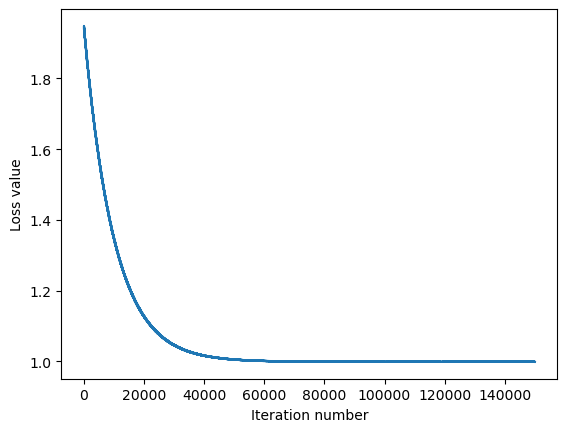

In [15]:
plt.plot(loss_his)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt



tic = time.time()
svm2 = SVM2()
data_nums = y.shape[0]
y = y.reshape(data_nums)
x_train = x[0 : 400, : ]
y_train = y[0 : 400]
x_test = x[400 : 500, : ]
y_test = y[400 : 500]




loss2= svm2.fit(x_train, y_train,0.7 , 40)


toc = time.time()
print('That tooks %fs' % (toc - tic))

iteration:0  pair_changed:131  loss:1.2370565812138554
iteration:0  pair_changed:131  loss:1.538778189200247
iteration:0  pair_changed:126  loss:1.877048030219325
iteration:0  pair_changed:123  loss:1.347285651936878
iteration:0  pair_changed:113  loss:1.5751575051961222
iteration:0  pair_changed:102  loss:1.4419236004433487
iteration:0  pair_changed:122  loss:1.715093166180268
iteration:0  pair_changed:116  loss:2.010700638177528
iteration:0  pair_changed:122  loss:1.663918466168581
iteration:0  pair_changed:112  loss:1.9529149721331727
iteration:0  pair_changed:120  loss:1.567454358276458
iteration:0  pair_changed:118  loss:1.6208925262721892
iteration:0  pair_changed:105  loss:1.5090378632243173
iteration:0  pair_changed:111  loss:2.4055212112243787
iteration:0  pair_changed:117  loss:1.4462418526915852
iteration:0  pair_changed:92  loss:1.7992296753428456
iteration:0  pair_changed:108  loss:1.681922801310485
iteration:0  pair_changed:94  loss:1.496597267401735
iteration:0  pair_cha

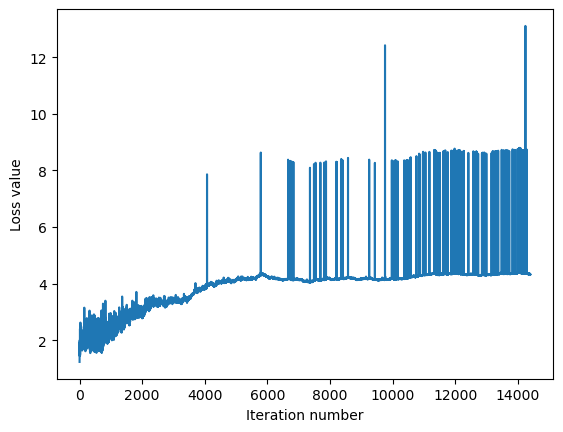

In [14]:
plt.plot(loss2)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

# predict and compare your results

In [16]:
y = y.astype('int')
y_test[:] = (y_test[:] - np.min(y_test[:])) / (np.max(y_test[:]) - np.min(y_test[:]))
y_train[:] = (y_train[:] - np.min(y_train[:])) / (np.max(y_train[:]) - np.min(y_train[:]))
y_t_pre = svm.predict(x_train)
print('train accuracy: %f' % (np.mean(y_train == y_t_pre), ))
y_val_pred = svm.predict(x_test)
print('validation accuracy: %f' % (np.mean(y_test == y_val_pred), ))


train accuracy: 0.945375
validation accuracy: 0.946000


In [15]:
y_t_pre2 = svm2.predict(x_train)
print('train accuracy: %f' % (np.mean(y_train == y_t_pre2), ))
y_val_pred2 = svm2.predict(x_test)
print('validation accuracy: %f' % (np.mean(y_test == y_val_pred2), ))

train accuracy: 0.947500
validation accuracy: 0.880000


In [25]:
from sklearn import svm
clf = svm.SVC()  
data_nums = y.shape[0]
y = y.reshape(data_nums)
x_train = x[0 : 8000, : ]
y_train = y[0 : 8000]
x_test = x[8000 : 10000, : ]
y_test = y[8000 : 10000]
tic = time.time()
clf.fit(x_train,y_train)
toc = time.time()
print('That tooks %fs' % (toc - tic))   

That tooks 1.197740s


In [27]:
#test_arr
clf.score(x_test, y_test)

0.943

In [28]:
#train_arr
clf.score(x_train, y_train)

0.96725